In [59]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv


%matplotlib inline

In [60]:
# Data
m = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

m.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [61]:
m.shape

(2553, 14)

# Train Test Split

In [62]:
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size=0.2)


In [72]:
print(X_train.shape)
print(X_test.shape)
X_train.head()

(2042, 10)
(511, 10)


,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
898,0.470,1,-9.080,1,0.0819,0.22800,0.000099,0.1590,0.555,301173
1062,0.155,0,-14.378,1,0.0428,0.98700,0.000060,0.1800,0.511,199800
2312,0.818,6,-5.238,0,0.0978,0.05800,0.000000,0.1100,0.348,177533
2445,0.823,1,-4.674,1,0.0384,0.00209,0.000855,0.3620,0.585,239440
1746,0.816,4,-6.698,1,0.0774,0.01620,0.002080,0.0965,0.648,202960


In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
# predictions
y_pred = model.predict(X_test)
y_pred[1:10]

array([0.59687531, 0.57110979, 0.47540825, 0.4651969 , 0.64270345,
       0.78677663, 0.64657551, 0.6239833 , 0.6243554 ])

In [75]:
model.score(X_test, y_test) #testing R2

0.2872535998378972

In [76]:
model.score(X_train, y_train) #training R2

0.3788193805720863

In [77]:
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y_test})
true_vs_pred.head()

,predict,trueV
1539,0.633906,0.830
197,0.596875,0.594
2154,0.571110,0.580
228,0.475408,0.729
110,0.465197,0.350


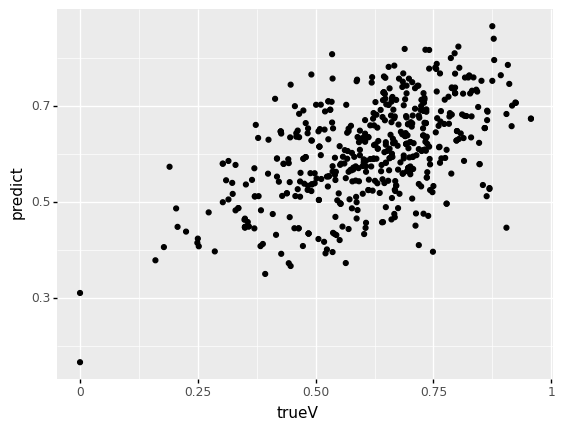

<ggplot: (-9223372036515386666)>

In [78]:
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point())

# K Fold

In [79]:
kf = KFold(n_splits = 10, shuffle = True)

In [80]:
X = m[predictors]
y = m["danceability"]

lr = LinearRegression()
mse = []
r2 = []

In [81]:
for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    r2.append(r2_score(y_test,model.predict(X_test)))
    

In [82]:
mse

[0.020930307424301006,
 0.02398415840437807,
 0.017611888653199907,
 0.014031482385972918,
 0.017964541727112288,
 0.021283298516371393,
 0.021093072207528905,
 0.007635165315696738,
 0.011737773142066496,
 0.011999264910150312]

In [83]:
np.mean(mse)

0.016827095268677806

In [84]:
r2

[-0.0026500320428106683,
 0.32289285991515637,
 0.39466086950544466,
 0.28631073738917756,
 0.2666614669225986,
 -0.01931044142466032,
 0.21743248871668797,
 0.26684400339532266,
 0.15093339176307585,
 0.1458587900640479]

In [85]:
np.mean(r2)

0.20296341342040405

# Leave One Out

In [86]:
loo = LeaveOneOut()

mse = []

In [87]:
for train,test in loo.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(X_test)))

In [88]:
np.mean(mse)

0.01577326185227478

# Always Get the Same Split!
When you do KFold or TTS, you will get slightly different splits every time you run the function, even with the same data! This is because the data is split randomly. 

If you want the same split every time, use the `random_state` argument.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(m[predictors],
                                                m["danceability"],
                                                test_size=0.2,
                                                random_state = 42)
kf = KFold(n_splits = 10, shuffle = True, random_state = 42) #we'll talk more about this later...

# Quick Note about Data Leakage...

In [90]:
# Say you want to standardize...
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness",
              "instrumentalness", "liveness", "valence", "duration_ms"]
contin = ["energy", "loudness", "speechiness", "acousticness",
              "instrumentalness", "liveness", "valence", "duration_ms"]


X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size=0.2)

X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
2101,0.651,7,-4.396,1,0.0266,0.0670,0.000000,0.1450,0.2030,294333
1614,0.595,1,-6.887,0,0.1090,0.0248,0.000005,0.0405,0.6290,261880
2040,0.918,11,-3.187,0,0.0912,0.0155,0.000015,0.2630,0.5950,220306
963,0.453,3,-6.824,1,0.0348,0.3070,0.000000,0.0844,0.0679,217440
2100,0.712,5,-4.418,1,0.0273,0.0400,0.000000,0.3090,0.4760,241986


In [91]:
zscore = StandardScaler()
zscore.fit(X_train[contin])

StandardScaler()

In [92]:
X_train[contin] = zscore.transform(X_train[contin])
X_test[contin] = zscore.transform(X_test[contin]) # DO NOT REFIT, I REPEAT DO NOT REFIT

In [93]:
# in KF
X = m[predictors]
y = m["danceability"]

lr = LinearRegression()

kf = KFold(5, shuffle = True)

mse = []
r2 = []

for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    z = StandardScaler()
    X_train[contin] = z.fit_transform(X_train[contin])
    X_test[contin] = z.transform(X_test[contin])
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    r2.append(r2_score(y_test,model.predict(X_test)))
    
print(np.mean(mse))
print(np.mean(r2))

0.017096654998859852
0.2608733282837335
